### Notes 
* 1 is for spam and 0 is for ham 

In [108]:
# import the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [109]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1", engine = "python")
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2758,ham,What time. IÛ÷m out until prob 3 or so,NaN,NaN,NaN
4972,ham,Oops I was in the shower when u called. Hey a ...,NaN,NaN,NaN
841,ham,Pls send me a comprehensive mail about who i'm...,NaN,NaN,NaN
5400,ham,HARD BUT TRUE: How much you show &amp; expres...,NaN,NaN,NaN
3608,ham,Joy's father is John. Then John is the ____ of...,NaN,NaN,NaN
3537,ham,We are pleased to inform that your application...,NaN,NaN,NaN
4518,ham,Just got part Nottingham - 3 hrs 63miles. Good...,NaN,NaN,NaN
360,ham,Ha ha cool cool chikku chikku:-):-DB-),NaN,NaN,NaN
2622,ham,Ok lor...,NaN,NaN,NaN
2108,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## Steps in building the project 
### 1. Data Cleaning
### 2. EDA
### 3. Text Preprocessing 
### 4. Model Building 
### 5. Evaluation 
### 6. Improvement
### 7. Website 
### 8. Deploy 

## 1. Data Cleaning 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [112]:
# check for null values 
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [113]:
# drop the last 3 columns 
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [114]:
# renaming the columns 
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [115]:
# convert the target column into numbers 
# ham: 0
# spam: 1

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["target"] = encoder.fit_transform(df["target"])

In [116]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
# check for missing values 
df.isna().sum()

target    0
text      0
dtype: int64

In [118]:
# check for duplicate values 
df.duplicated().sum()

403

In [12]:
# drop the duplicate values 
df = df.drop_duplicates(keep="first")

## 2. EDA

In [13]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

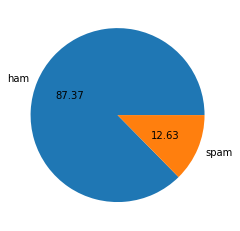

In [14]:
# plotting a pie chart and getting the percentage 
import matplotlib.pyplot as plt 
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f");

#### From the above pie-chart it is clear that the data is imbalanced.

In [15]:
import nltk 

In [119]:
# get the length of each text 
df["no_of_charecters"] = df["text"].apply(len)

In [120]:
# get the number of words from each text 
df["no_of_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [121]:
# get the number of sentences 
df["no_of_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [122]:
df.head()

,target,text,no_of_charecters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [123]:
# get the description of the data from newly created columns 
df[["no_of_charecters", "no_of_words", "no_of_sentences"]].describe()

,no_of_charecters,no_of_words,no_of_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [124]:
# analyze/get the description of the spam and ham separately 
# ham 
df[df["target"] == 0][["no_of_charecters", "no_of_words", "no_of_sentences"]].describe()

,no_of_charecters,no_of_words,no_of_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [125]:
# spam 
df[df["target"] == 1][["no_of_charecters", "no_of_words", "no_of_sentences"]].describe()

,no_of_charecters,no_of_words,no_of_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


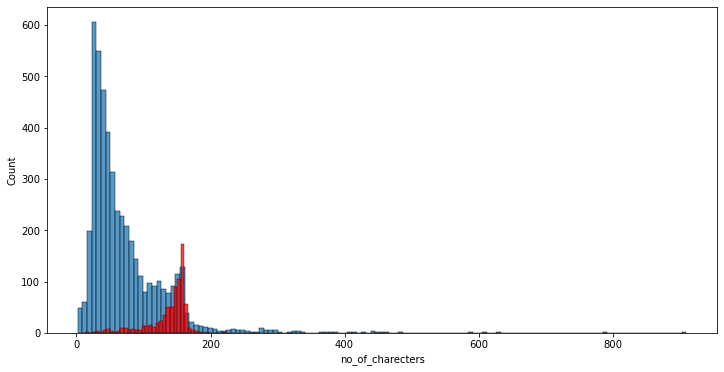

In [126]:
# lets plot the histogram and understand it better 
import seaborn as sns 
plt.figure(figsize=(12, 6))
# ham 
sns.histplot(df[df["target"]==0]["no_of_charecters"])
# spam 
sns.histplot(df[df["target"]==1]["no_of_charecters"], color="red");

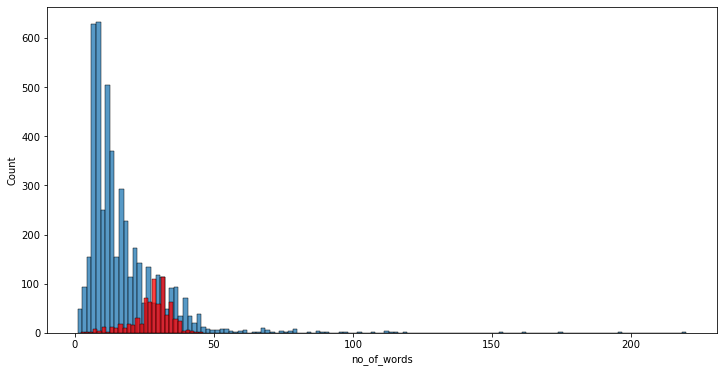

In [127]:
plt.figure(figsize=(12, 6))
# ham 
sns.histplot(df[df["target"]==0]["no_of_words"])
# spam 
sns.histplot(df[df["target"]==1]["no_of_words"], color="red");

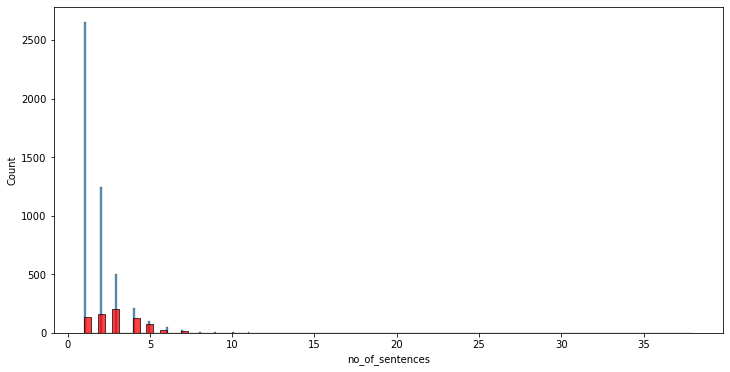

In [128]:
plt.figure(figsize=(12, 6))
# ham 
sns.histplot(df[df["target"]==0]["no_of_sentences"])
# spam 
sns.histplot(df[df["target"]==1]["no_of_sentences"], color="red");

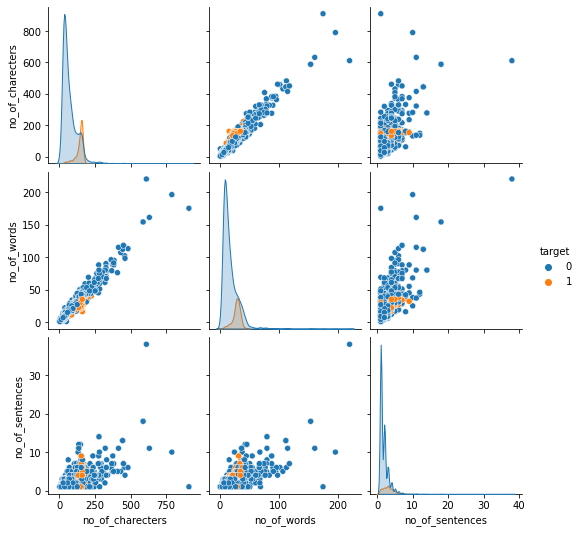

In [129]:
sns.pairplot(df, hue="target");

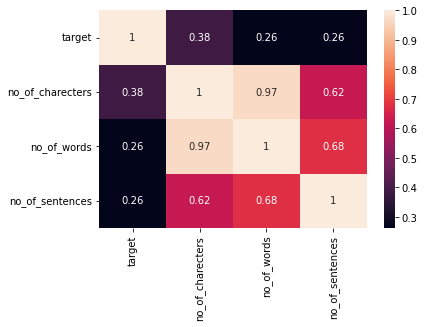

In [27]:
# plot the correlation matrix 
sns.heatmap(df.corr(), annot=True);

## 3. Data/Text Preprocessing 
* 1. convert to lower case 
* 2. Tokenization(split the text into words)
* 3. remove special charecters 
* 4. remove stop words(just used for sentence formation not have actual meaning) and punctuation 
* 5. stemming (dance, dancing treat these all as one for example: dance)

In [28]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer

In [130]:
# function to achieve all of the above conditions 
def transform_text(text):
    # convert the text to lower case 
    text = text.lower()
    
    # tokenization 
    text = nltk.word_tokenize(text)
    
    # remove the special charecters
    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i)
            
    # clone the temp to text 
    text = temp[:]
    temp.clear()
    
    # remove the stop words and punctuation 
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            temp.append(i)
            
    text = temp[:]
    temp.clear()
    
    # stemming 
    ps = PorterStemmer()
    for i in text:
        temp.append(ps.stem(i))
        
    return " ".join(temp)

In [132]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight")

'gon na home soon want talk stuff anymor tonight'

In [133]:
df["transformed_text"] = df["text"].apply(transform_text)

In [135]:
df.head(5)

,target,text,no_of_charecters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
# Get the most used words in ham and spam using WorldCloud 
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

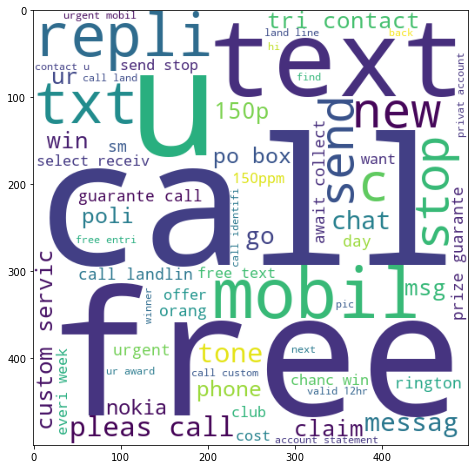

In [140]:
# for spam messages 
plt.figure(figsize=(12, 8))
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc);

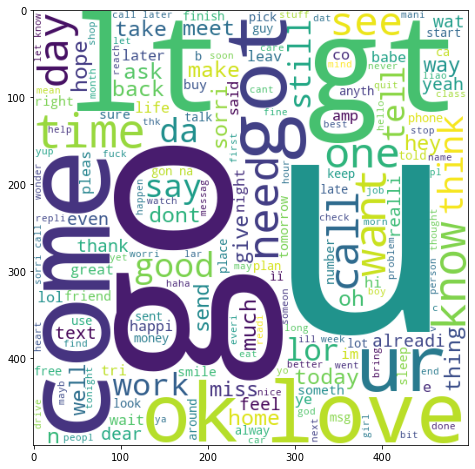

In [138]:
# for ham messages 
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(ham_wc);

In [139]:
# fetch the top 40 words from spam messages
spam_words = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_words.append(word)
        
len(spam_words)

11490

C:\Users\Omkar\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


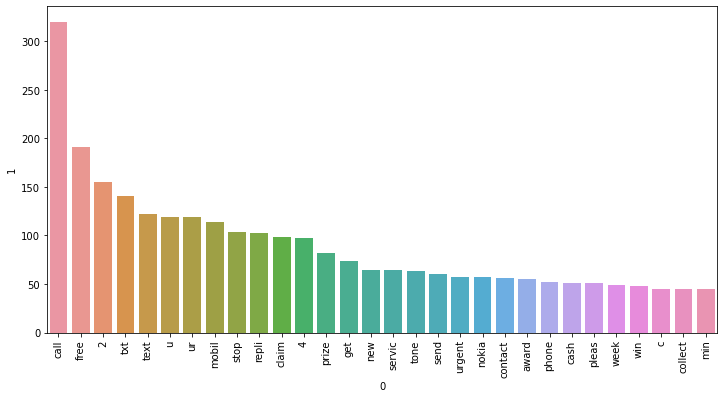

In [37]:
# plot the bar graph 
from collections import Counter 
plt.figure(figsize=(12, 6))
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0], pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation="vertical");

In [141]:
# Fetch the top 40 words from ham messages 
ham_words = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_words.append(word)
        
len(ham_words)

38221

C:\Users\Omkar\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


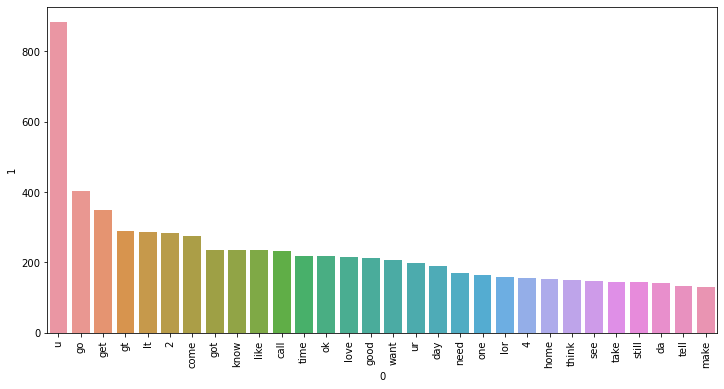

In [40]:
# len(ham_words)
# plot the bar graph for the ham words 
plt.figure(figsize=(12, 6))
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0], pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation="vertical");

## 4. Model Building 

In [142]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# convert the text into numbers 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [143]:
# X = cv.fit_transform(df["transformed_text"]).toarray()
X = tfid.fit_transform(df["transformed_text"]).toarray()
X.shape

(5572, 3000)

In [144]:
y = df["target"].values

In [145]:
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [146]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [147]:
# fit the data to the model 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print("--Gaussian Naive Bayes--\n")
print("Accuracy Score: ", accuracy_score(y_pred1, y_test)) 
print("Confusion Matrix:\n", confusion_matrix(y_pred1, y_test)) 
print("Precision Score: ", precision_score(y_pred1, y_test))

--Gaussian Naive Bayes--

Accuracy Score:  0.8547085201793722
Confusion Matrix:
 [[821  18]
 [144 132]]
Precision Score:  0.88


In [148]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test) 

print("--Multinomial Naive Bayes--\n")
print("Accuracy Score: ", accuracy_score(y_pred2, y_test)) 
print("Confusion Matrix:\n", confusion_matrix(y_pred2, y_test)) 
print("Precision Score: ", precision_score(y_pred2, y_test))

--Multinomial Naive Bayes--

Accuracy Score:  0.9775784753363229
Confusion Matrix:
 [[965  25]
 [  0 125]]
Precision Score:  0.8333333333333334


In [149]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("--Bernoulli Naive Bayes--\n")
print("Accuracy Score: ", accuracy_score(y_pred3, y_test)) 
print("Confusion Matrix:\n", confusion_matrix(y_pred3, y_test)) 
print("Precision Score: ", precision_score(y_pred3, y_test))

--Bernoulli Naive Bayes--

Accuracy Score:  0.9748878923766816
Confusion Matrix:
 [[960  23]
 [  5 127]]
Precision Score:  0.8466666666666667


#### Note: We are going to use tfidf with multinomial naive bayes

In [150]:
# Let's try some another models and compare with the Naive Bayes 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [151]:
# make the object for each algorithm
lr = LogisticRegression(solver="liblinear", penalty="l1") 
svc = SVR(kernel="sigmoid", gamma=1.0) 
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2) 
xgc = XGBClassifier(n_estimators=50, random_state=2)

In [152]:
clfs = {
    "LR": lr,
#     "SVC": svc,
    "DTC": dtc,
    "MNB": mnb,
    "KNC": knc, 
    "RFC": rfc,
    "ABC": abc,
    "BC": bc,
    "ETC": etc,
    "GBC": gbc,
    "XGC": xgc
}

In [153]:
# function to train the classifiers 
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds) 
    precision = precision_score(y_test,  y_preds) 
    
    return accuracy, precision

In [156]:
train_classifier(lr, X_train, y_train, X_test, y_test)

(0.9461883408071748, 0.66)

In [157]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test) 
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9461883408071748
Precision -  0.66
For  DTC
Accuracy -  0.9417040358744395
Precision -  0.6466666666666666
For  MNB
Accuracy -  0.9775784753363229
Precision -  0.8333333333333334
For  KNC
Accuracy -  0.9201793721973094
Precision -  0.4066666666666667
For  RFC
Accuracy -  0.9757847533632287
Precision -  0.82
For  ABC
Accuracy -  0.9668161434977578
Precision -  0.7733333333333333
For  BC
Accuracy -  0.9695067264573991
Precision -  0.8533333333333334
For  ETC
Accuracy -  0.97847533632287
Precision -  0.8466666666666667
For  GBC
Accuracy -  0.95695067264574
Precision -  0.6866666666666666
For  XGC
Accuracy -  0.9730941704035875
Precision -  0.8133333333333334


In [162]:
# make a dataframe to analyze all the results 
performance_df = pd.DataFrame({"Algorithms": clfs.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values(by="Accuracy", ascending=False)

In [163]:
performance_df

,Algorithms,Accuracy,Precision
7,ETC,0.978475,0.846667
2,MNB,0.977578,0.833333
4,RFC,0.975785,0.820000
9,XGC,0.973094,0.813333
6,BC,0.969507,0.853333
5,ABC,0.966816,0.773333
8,GBC,0.956951,0.686667
0,LR,0.946188,0.660000
1,DTC,0.941704,0.646667
3,KNC,0.920179,0.406667


In [164]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))